In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from nltk.corpus import stopwords

In [6]:
stop_words = set(stopwords.words('english'))

path = os.path.join(os.getcwd(), 'tweet_texts_pharma/')

def prepare_wordlist(comp):
    df = pd.read_csv(path + '%s_tweets.txt' % comp, sep='|')
    all_tweets = []
    
    def clean_tweet(tweet):
        check = '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)'
        return ' '.join(re.sub(check, ' ', tweet).split()).replace('RT ','')
    
    df['clean_tweet'] = [clean_tweet(tweet.replace('&amp;','&')).replace(' & ','&') for tweet in df['text']]    
    
    for tweet in df['clean_tweet']:
        for word in tweet.split(' '):
            if word.lower() not in stop_words:
                all_tweets.append(word.lower())
   
    return all_tweets

In [7]:
words_list = prepare_wordlist('AstraZeneca')

# I'm making sure that the wordcloud is shaped as AZ logo
az_mask = np.array(Image.open(path + 'az_symbol.png'))

# the cloud will be in AZ official colours
az_colors = ImageColorGenerator(az_mask)

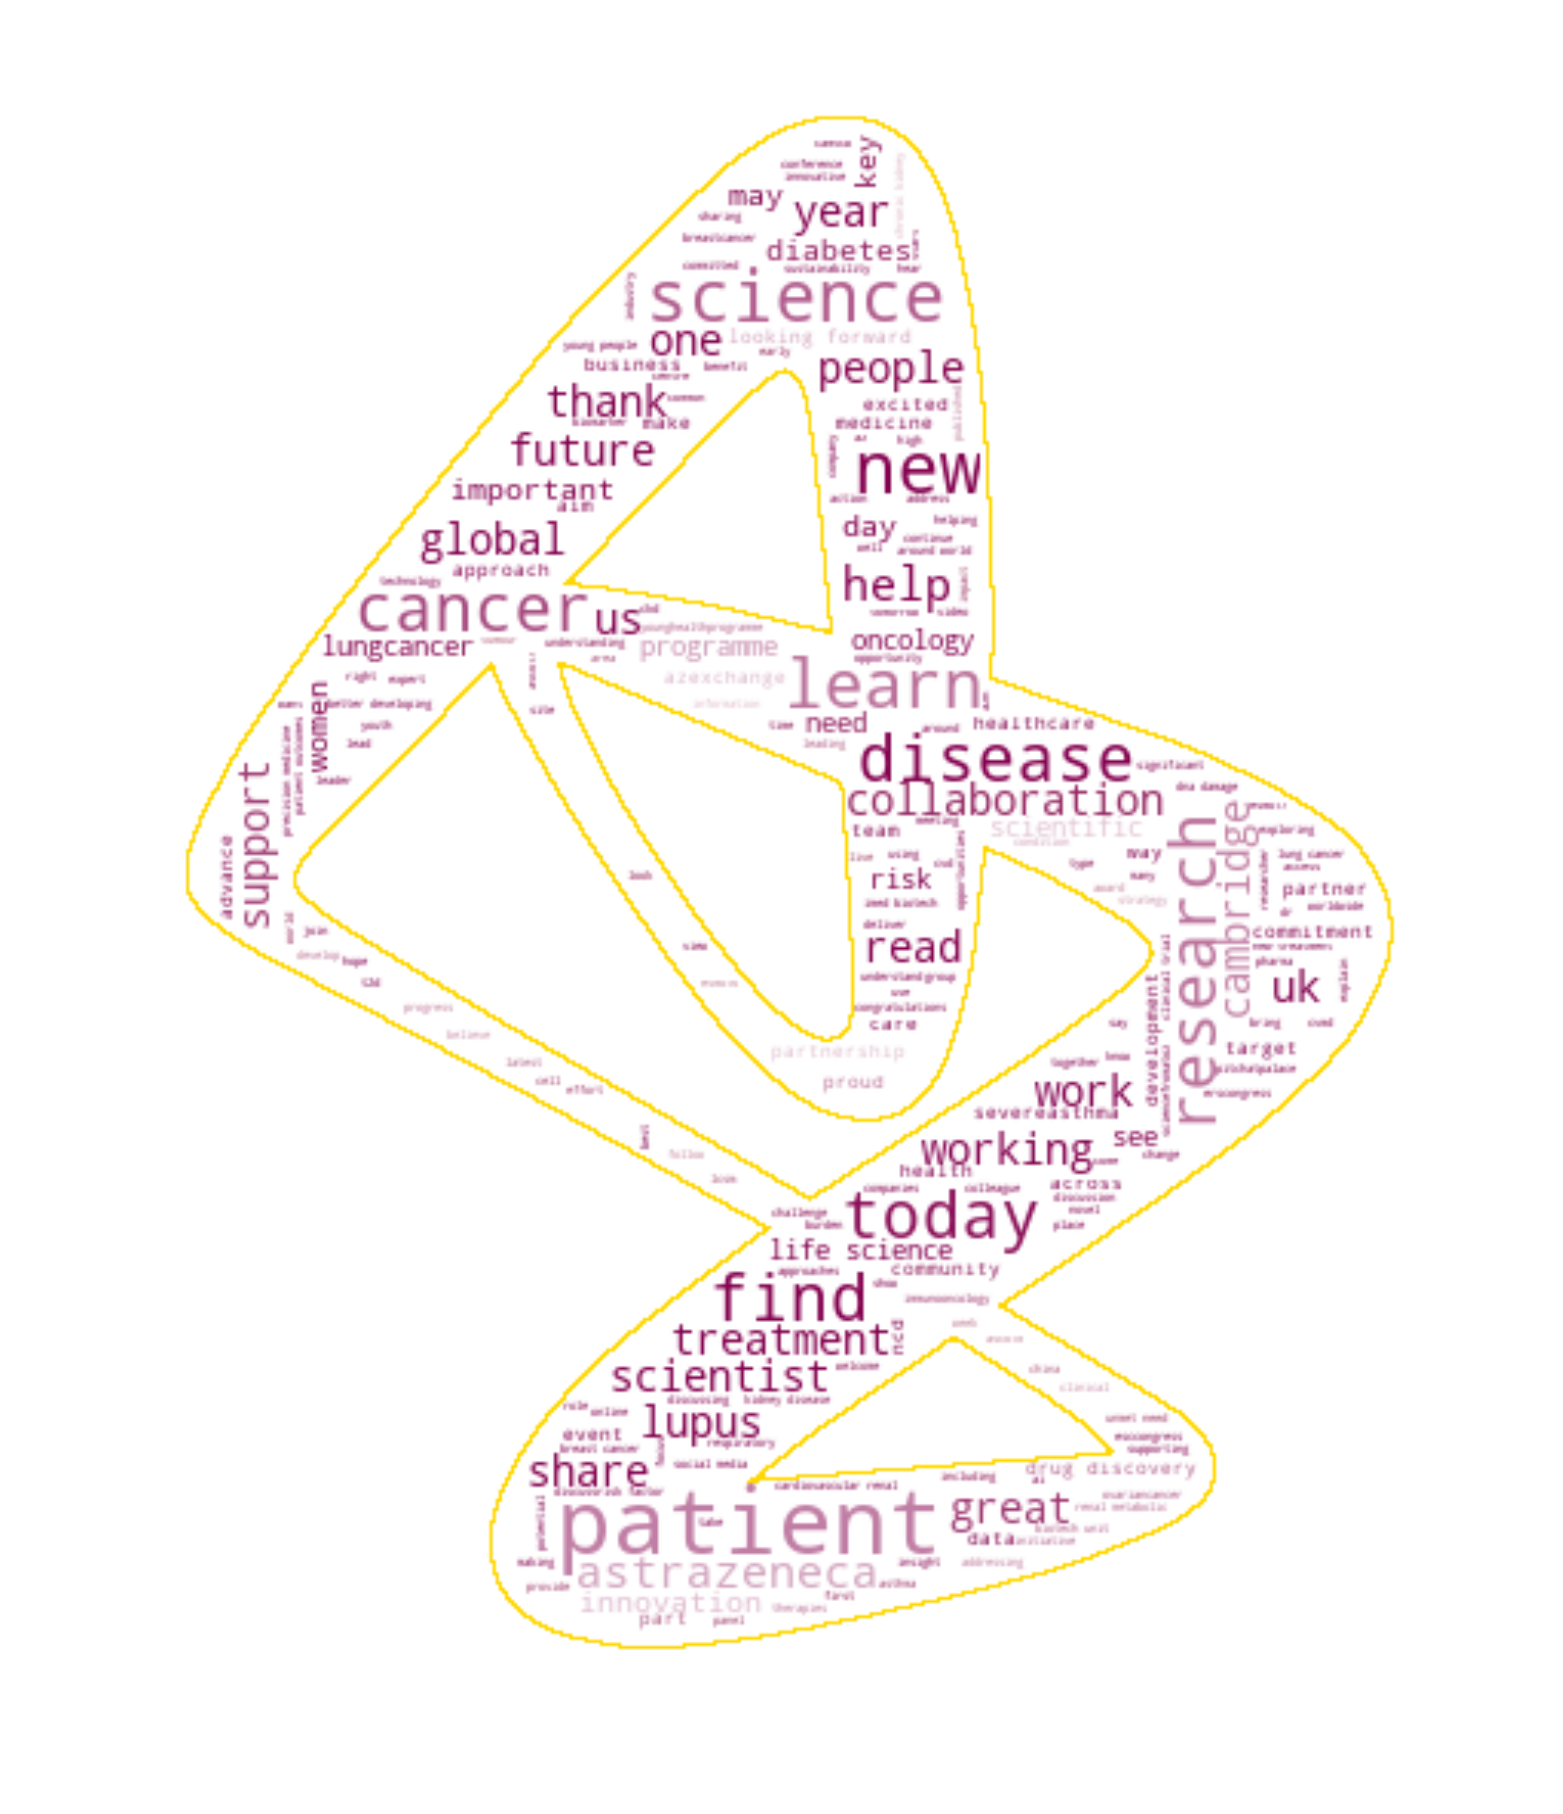

In [21]:
plt.figure(figsize = (25,25))
wordcloudAZ = WordCloud(background_color = 'white',
                        max_words = 500,
                        max_font_size = 400,
                        width = 1200, height = 1000,
                        random_state = 42,
                        mask = az_mask,
                        contour_color = 'gold',
                        contour_width = 0.8,
                      ).generate(' '.join([a for a in words_list]))

plt.imshow(wordcloudAZ.recolor(color_func = az_colors), interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('az.png')
plt.show()